In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set your dataset path
DATASET_PATH = '/Users/anshulshukla/Desktop/speech recognition/dataset'


In [7]:
# Load dataset paths and labels
paths = []
labels = []


In [9]:
for dirname, _, filenames in os.walk(DATASET_PATH):
    for filename in filenames:
        if filename.endswith('.wav'):  # Assuming the dataset contains .wav files
            paths.append(os.path.join(dirname, filename))
            label = filename.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())

In [11]:
print('Dataset loaded')

Dataset loaded


In [13]:
# Create a DataFrame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels


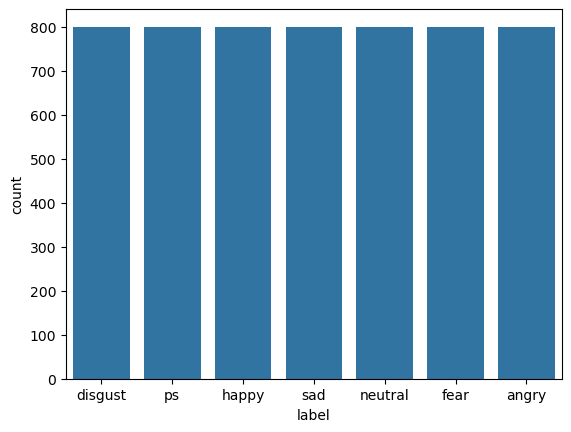

In [15]:
# Visualize label distribution
sns.countplot(x=df['label'])
plt.show()

In [17]:
# Function to plot waveform
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

In [19]:
# Function to plot spectrogram
def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

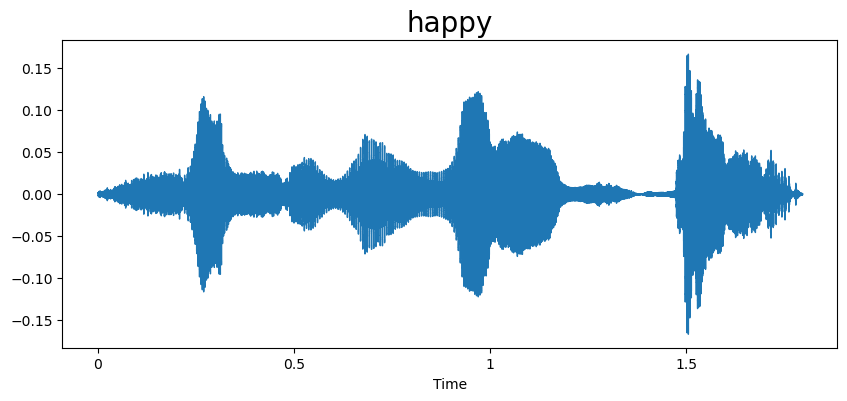

In [21]:
# Test loading a file and plotting
emotion = 'happy'  # Example emotion
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

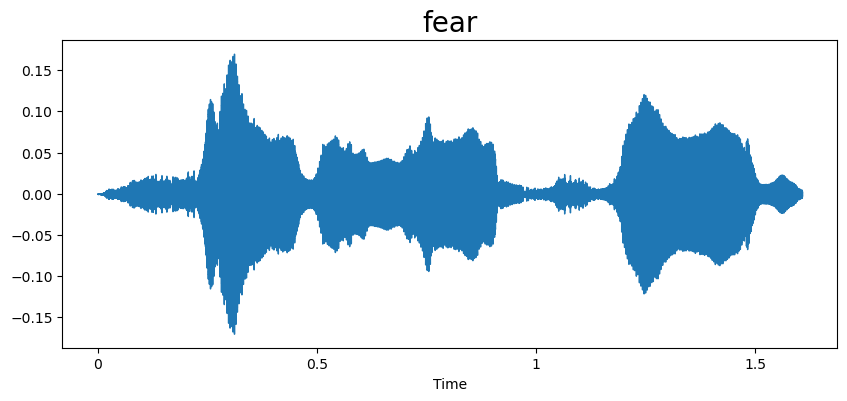

In [72]:
# Test loading a file and plotting
emotion = 'fear'  # Example emotion
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

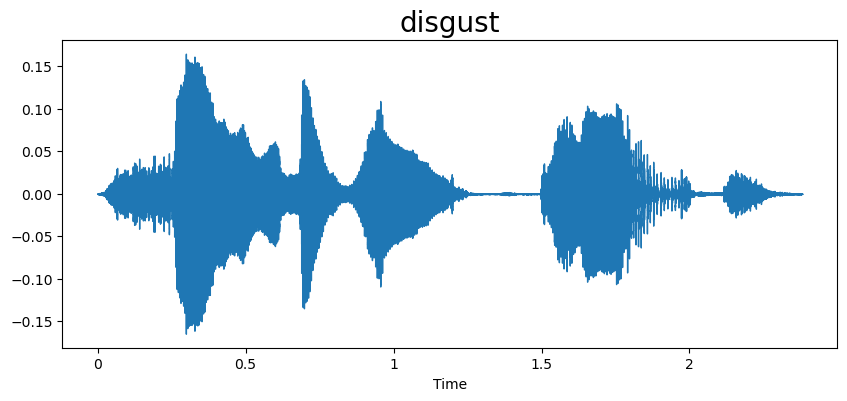

In [23]:
# Test loading a file and plotting
emotion = 'disgust'  # Example emotion
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

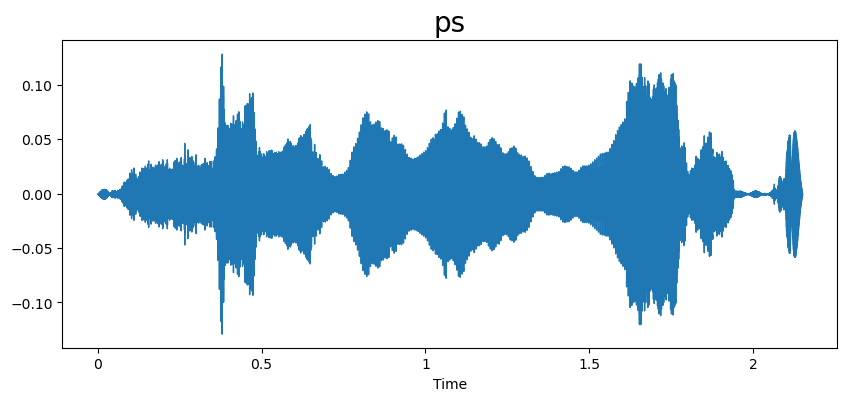

In [76]:
# Test loading a file and plotting
emotion = 'ps'  # Example emotion
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

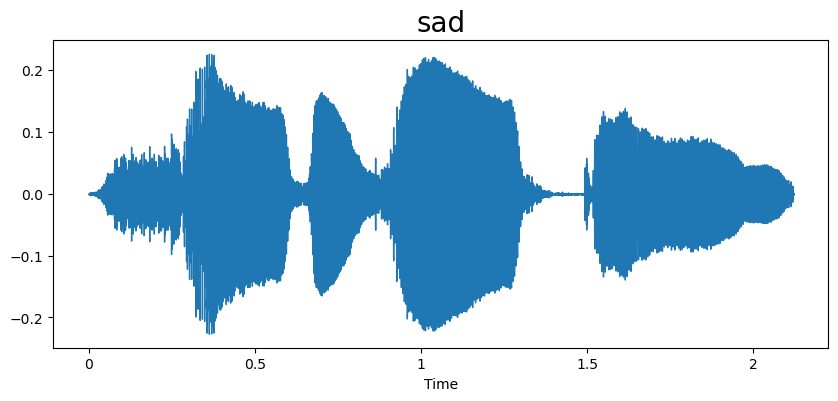

In [25]:
# Test loading a file and plotting
emotion = 'sad'  # Example emotion
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

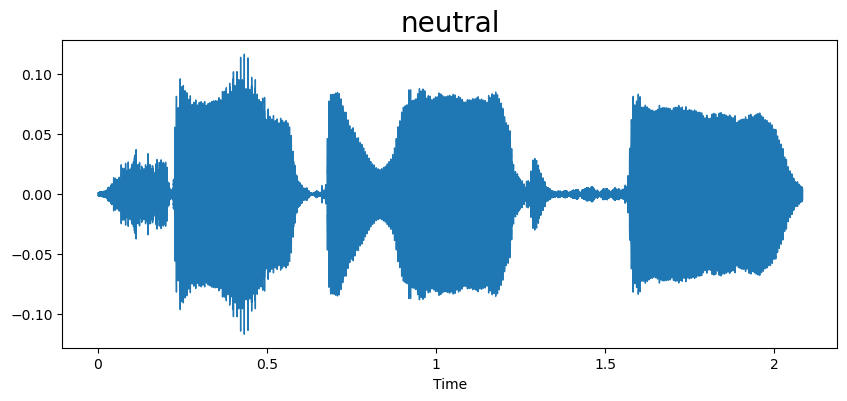

In [27]:
# Test loading a file and plotting
emotion = 'neutral'  # Example emotion
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

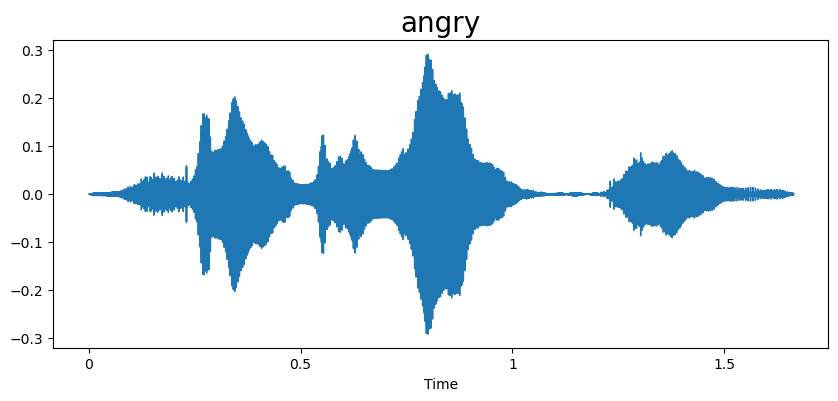

In [29]:
# Test loading a file and plotting
emotion = 'angry'  # Example emotion
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
Audio(path)

In [31]:
# Define the extract_mfcc function
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [33]:
# Extract MFCC features for all files
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X = np.array([x for x in X_mfcc])
X = np.expand_dims(X, -1)
print("Feature shape:", X.shape)

Feature shape: (5600, 40, 1)


In [34]:
# One-hot encode labels
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
print("Label shape:", y.shape)

Label shape: (5600, 7)


In [35]:
# Build LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')  # Adjust the number of classes as needed
])

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 2.9642e-04
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9993 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 5.4782e-04
Epoch 3/100


In [ ]:
# Plot accuracy
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='validate accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

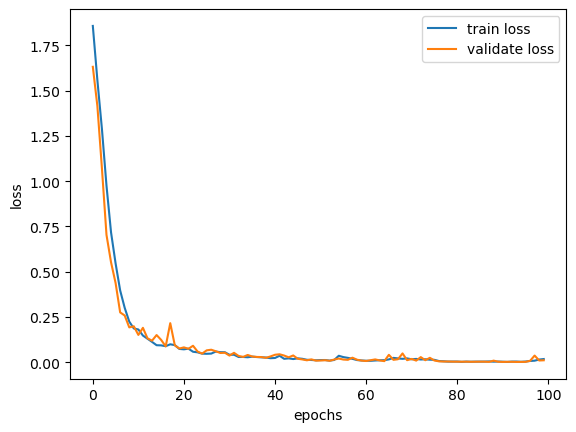

In [56]:
# Plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='validate loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()